<a href="https://colab.research.google.com/github/dkapitan/jads-nhs-proms/blob/master/notebooks/3_0_data_preparation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Background to osteoarthritis case study

_taken from [narrative seminar Osteoarthritis by Hunter & Bierma-Zeinstra (2019) in the Lancet](https://github.com/dkapitan/jads-nhs-proms/blob/master/references/hunter2019osteaoarthritis.pdf)._

Outcomes from total joint replacement can be optimised if patient selection identifies marked joint space narrowing. Most improvement will be made in patients with complete joint space loss and evident bone attrition. Up to 25% of patients presenting for total joint replacement continue to complain of pain and disability 1 year after well performed surgery. Careful preoperative patient selection (including consideration of the poor outcomes that are more common in people who are depressed, have minimal radiographic disease, have minimal pain, and who are morbidly obese), shared decision making about surgery, and informing patients about realistic outcomes of surgery are needed to minimise the likelihood of dissatisfaction.

# Data Preparation

This is day 2 from the [5-day JADS NHS PROMs data science case study](https://github.com/dkapitan/jads-nhs-proms/blob/master/references/outline.md).



## Learning objectives: select and clean data
- Impute missing values
- Select main input variables X (feature engineering)
- Define target Y (clustered classes, categories)
- Decide how to handle correlated input features

## Learning objectives: Python
- [Pythonic data cleaning](https://realpython.com/python-data-cleaning-numpy-pandas/)<br>- [Pandas GroupBy](https://realpython.com/pandas-groupby/)<br> - [Correlations in with numpy, scipy and pandas](https://realpython.com/numpy-scipy-pandas-correlation-python/)

## Recap from previous lecture
- Good outcome for knee replacement Y is measured using difference in Oxford Knee Score (OKS)
- Research has shown that an improvement in OKS score of approx. 30% is relevant ([van der Wees 2017](https://github.com/dkapitan/jads-nhs-proms/blob/master/references/vanderwees2017patient-reported.pdf)). Hence an increase of +14 points is considered a 'good' outcome.
- to account for the ceiling effect, a high final `t1_oks_score` is also considered as a good outcome (even if `delta_oks_score` is smaller than 14).

    

# Select and clean data


In [0]:
import warnings
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.feature_selection import chi2, VarianceThreshold
import sklearn.linear_model

#supressing warnings for readability
warnings.filterwarnings("ignore")

# To plot pretty figures directly within Jupyter
%matplotlib inline

# choose your own style: https://matplotlib.org/3.1.0/gallery/style_sheets/style_sheets_reference.html
plt.style.use('ggplot')

# Go to town with https://matplotlib.org/tutorials/introductory/customizing.html
# plt.rcParams.keys()
mpl.rc('axes', labelsize=14, titlesize=14)
mpl.rc('figure', titlesize=20)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# contants for figsize
S = (8,8)
M = (12,12)
L = (14,14)

# pandas options
pd.set_option("display.max.columns", None)
pd.set_option("display.max.rows", None)
pd.set_option("display.precision", 2)


In [0]:
# re-run relevant code from previous lecture
# import data
df = pd.read_parquet('https://github.com/dkapitan/jads-nhs-proms/blob/master/data/interim/knee-provider.parquet?raw=true')

# replace sentinel values with NA
dfc = df.copy()
dfc.loc[:,['t0_eq_vas', 't1_eq_vas']] = dfc.loc[:,['t0_eq_vas', 't1_eq_vas']].replace(999, np.nan).astype('Int64')
_no9 = [col for col in df.columns if col.startswith('oks_t') and not col.endswith('score')]
dfc.loc[:,_no9] = df.loc[:,_no9].replace(9, np.nan).astype('Int64')

# add delta_oks_score and Y
def good_outcome(oks_t1, delta_oks, abs_threshold=43, mcid=13):
  if oks_t1 > abs_threshold or delta_oks > mcid:
    return True
  else:
    return False


dfc['delta_oks_score'] = dfc.oks_t1_score - dfc.oks_t0_score
dfc['Y'] = dfc.apply(lambda row: good_outcome(row['oks_t1_score'], row['delta_oks_score']), axis=1)

## Describing the data

### Setting options for pandas

### Example: volume per provider per year

In [0]:
# count number of providers
df.provider_code.unique().shape

(294,)

In [0]:
# volume per provider per year
volume_provider_year = df.groupby(['year', 'provider_code'])['procedure'].count().unstack()
volume_provider_year.iloc[:,0:20]

provider_code,ADP02,AHH,AVQ,NFH01,NN401,NN801,NQM01,NT202,NT204,NT205,NT206,NT209,NT210,NT211,NT212,NT213,NT214,NT215,NT218,NT219
year,,,,,,,,,,,,,,,,,,,,
2016/17,164.0,24.0,NaN,NaN,12.0,33.0,NaN,18.0,60.0,9.0,23.0,49.0,84.0,NaN,16.0,214.0,78.0,153.0,18.0,82.0
2017/18,236.0,30.0,NaN,NaN,7.0,43.0,10.0,22.0,75.0,6.0,28.0,62.0,73.0,17.0,50.0,335.0,112.0,11.0,27.0,94.0
2018/19,323.0,16.0,139.0,13.0,22.0,66.0,12.0,28.0,106.0,16.0,65.0,65.0,72.0,13.0,76.0,403.0,127.0,9.0,32.0,91.0


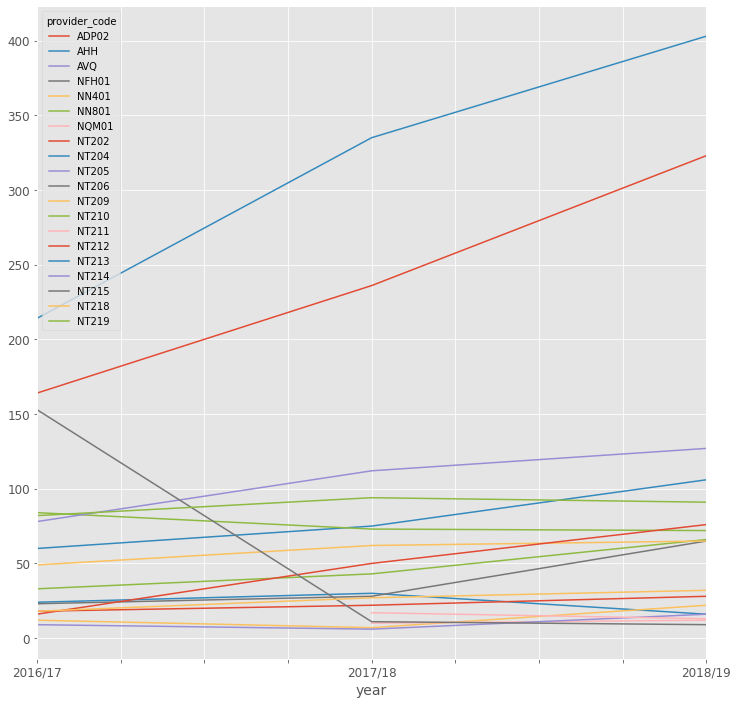

In [0]:
# first 20 providers in the data
volume_provider_year.iloc[:,0:20].plot(figsize=M);

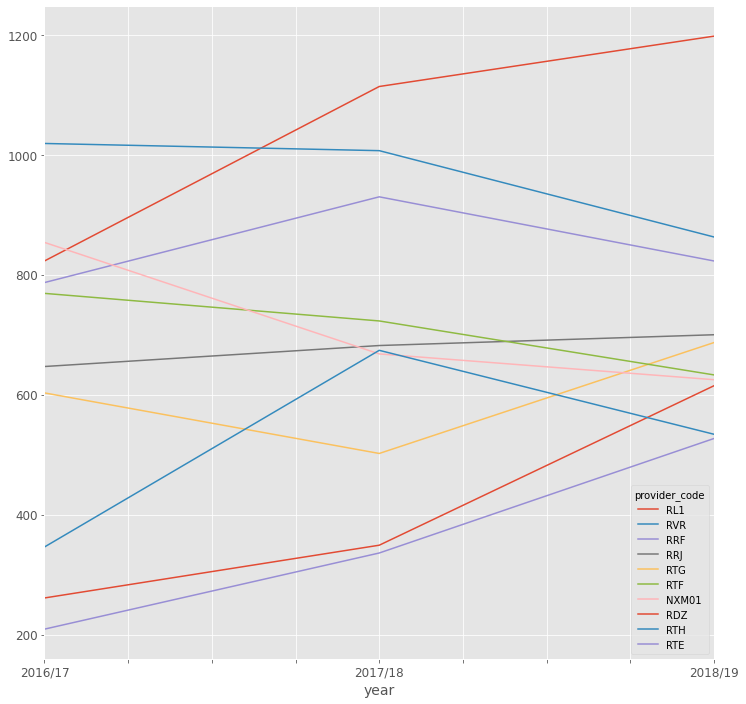

In [0]:
# select 10 largest providers by 2018/19
_year = (df.year == '2018/19')
top10 = df.loc[_year,:].groupby('provider_code').count()['procedure'].sort_values(ascending=False).head(10)
volume_provider_year.loc[:, list(top10.index)].plot(figsize=M);

## Discussion

### **Question:** what are relevant considerations to handle NAs?
- imputation with mean/median?
- just drop all?

### **Question:** what would you choose as the primary outcome Y?

# Conclusion and reflection

## Discussion of results

* ...
* ...


## Checklist for results from data preparation process
* ...
* ...
